<a href="https://colab.research.google.com/github/rmrramani/ds-projects/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
# `This notebook is on twitter sentiment analysis, Tamilnadu Weatherman tweets are considerd this analysis.*`*
```

In [21]:
#import the libraries
import pandas as pd #data anipulation
import numpy as np #array 
import matplotlib.pyplot as plt #visualization
plt.style.use('fivethirtyeight')

#Twitter api to extract tweets
import tweepy

#regular expression
import re

#nltk libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

#textblob for polarity and wordcloud for to showcase the frequent words
from textblob import TextBlob
from wordcloud import WordCloud

#for Special Counter dictionary
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#load the file which contain twitter api keys(credentials)

from google.colab import files
uploaded=files.upload()

Saving tlog.csv to tlog.csv


In [4]:
#Unpacking the credentials and assign to variables
login=pd.read_csv('tlog.csv')

consumerKey, consumerSecret, accessToken, accessTokenSecret=[login['key'][i] for i in range(len(login))]

In [5]:
#Create the authentication object

auth=tweepy.OAuthHandler(consumerKey,consumerSecret)

auth.set_access_token(accessToken,accessTokenSecret)

api=tweepy.API(auth_handler=auth,wait_on_rate_limit=True,timeout=600,retry_delay=120)

full_list=list()
favorite_list=list()
retweet_list=list()
tweet_time=list()

for status in tweepy.Cursor(api.user_timeline,screen_name='praddy06',lang='eng',tweet_mode='extended',exclude_replies=True,include_rts=False,).items(7777):
  #print(status.full_text)
  full_list.append(status.full_text)
  favorite_list.append(status.favorite_count)
  retweet_list.append(status.retweet_count)
  tweet_time.append(status.created_at)
print(len(full_list))

859


In [6]:
#create dataframe using twitter data
df=pd.DataFrame(np.array([full_list,favorite_list,retweet_list,tweet_time]).transpose(),columns=['tweets','favarites_count','retweet_count','time',])
df.head(20)
#df1.to_csv('tnweatherman860.csv',index=False)

,tweets,favarites_count,retweet_count,time
0,"What a day for South TN dams in Kanyakumari, T...",508,58,2021-10-17 02:45:23
1,Idukki Dam (biggest dam in kerala) inflow jump...,476,61,2021-10-16 11:32:05
2,Thats one hell of rains in Papanasam dam At 03...,204,23,2021-10-16 11:09:15
3,Crazy rains in Kerala and spillover rains even...,900,170,2021-10-16 08:31:29
4,Two sides UAC and North TN favorite winds rema...,187,14,2021-10-13 08:10:40
5,"What a day for TN, now it is the turn of delta...",593,42,2021-10-11 13:06:22
6,"Krishnagiri, Dharmapuri, Salem, Namakkal, Karu...",412,31,2021-10-10 16:09:46
7,Another perfect day for rains in North TN to D...,341,23,2021-10-10 09:16:05
8,The crazy cloudburst yesterday in Marina beach...,3546,568,2021-10-10 05:16:35
9,"96.4 mm in DGP office in less than an hour, no...",397,30,2021-10-10 02:49:51


In [8]:
#check for length of the dataframe and duplication
print(f"Rows:{df.shape[0]}, Columns:{df.shape[1]}")
print("\n")
print(f"number of duplication: {df.duplicated().sum()} ")

Rows:859, Columns:4


number of duplication: 0 


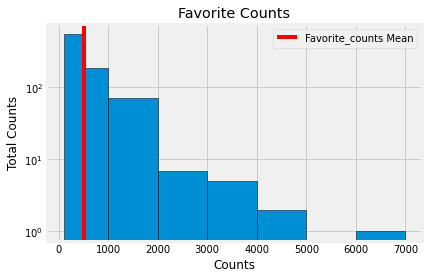

In [9]:
#histogram for favorite counts with log scale
#On an average favorite count is near 500
bins=[100,500,1000,2000,3000,4000,5000,6000,7000,]
plt.hist(df['favarites_count'],bins=bins,edgecolor='black',log=True);
plt.axvline(df['favarites_count'].mean(),color='red',label="Favorite_counts Mean")
plt.legend()
plt.title('Favorite Counts')
plt.xlabel('Counts')
plt.ylabel('Total Counts');

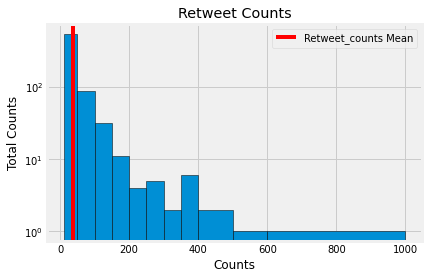

In [11]:
#histogram for retweet counts with log scale
#On an average retweet count is near 40
bins=[10,50,100,150,200,250,300,350,400,500,600,1000]
plt.hist(df['retweet_count'],bins=bins,edgecolor='black',log=True);
plt.axvline(df['retweet_count'].mean(),color='red',label="Retweet_counts Mean")
plt.legend()
plt.title('Retweet Counts')
plt.xlabel('Counts')
plt.ylabel('Total Counts');

In [12]:
#text cleaning
#create a function to clean the tweets

stop_words=set(stopwords.words('english'))

def cleantext(text):
  text=re.sub(r'@[A-Za-z0-9_]+','',text) #remove @mentions
  text=re.sub(r'#','',text)# remove hashtag
  text=re.sub(r"http\S+", "", text) #remove urls
  token=RegexpTokenizer(r'\w+') #
  text=token.tokenize(text)
  text=' '.join(text)
  char_pattern=r'[^a-zA-Z0-9]'
  text=re.sub(char_pattern,' ',text)
  #word tokenize and stopword removal
  text=word_tokenize(text)
  text=[word for word in text if not word in stop_words]
  text=' '.join(text)
  return text

In [13]:
#column with processed tweets
df['processed_tweets']=df['tweets'].apply(cleantext)

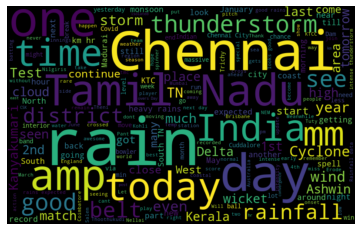

In [14]:
#creating word cloud
allwords=' '.join([twts for twts in df['processed_tweets']])

wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=150 ).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear' );
plt.axis('off');

In [16]:
#create a function to get the subjectivity 

def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polority(text):
  return TextBlob(text).sentiment.polarity

In [17]:
#additional columns for subjectivity and polarity
df['subjectivity']=df['processed_tweets'].apply(get_subjectivity)
df['polarity']=df['processed_tweets'].apply(get_polority)

#vanity check
df.head()

,tweets,favarites_count,retweet_count,time,processed_tweets,subjectivity,polarity
0,"What a day for South TN dams in Kanyakumari, T...",508,58,2021-10-17 02:45:23,What day South TN dams Kanyakumari Tirunelveli...,0.275000,0.175000
1,Idukki Dam (biggest dam in kerala) inflow jump...,476,61,2021-10-16 11:32:05,Idukki Dam biggest dam kerala inflow jumped 65...,0.275000,0.175000
2,Thats one hell of rains in Papanasam dam At 03...,204,23,2021-10-16 11:09:15,Thats one hell rains Papanasam dam At 03 00 pm...,0.000000,0.000000
3,Crazy rains in Kerala and spillover rains even...,900,170,2021-10-16 08:31:29,Crazy rains Kerala spillover rains even sustai...,0.666667,-0.055556
4,Two sides UAC and North TN favorite winds rema...,187,14,2021-10-13 08:10:40,Two sides UAC North TN favorite winds remains ...,0.770000,0.330000


In [18]:
#create a function to compute negative neutral and positive

def analysis(score):
  if score <0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'

In [19]:
#columns with sentiments (i.e positive negative neutral)
df['Analysis']=df['polarity'].apply(analysis)

df.head()

,tweets,favarites_count,retweet_count,time,processed_tweets,subjectivity,polarity,Analysis
0,"What a day for South TN dams in Kanyakumari, T...",508,58,2021-10-17 02:45:23,What day South TN dams Kanyakumari Tirunelveli...,0.275000,0.175000,Positive
1,Idukki Dam (biggest dam in kerala) inflow jump...,476,61,2021-10-16 11:32:05,Idukki Dam biggest dam kerala inflow jumped 65...,0.275000,0.175000,Positive
2,Thats one hell of rains in Papanasam dam At 03...,204,23,2021-10-16 11:09:15,Thats one hell rains Papanasam dam At 03 00 pm...,0.000000,0.000000,Neutral
3,Crazy rains in Kerala and spillover rains even...,900,170,2021-10-16 08:31:29,Crazy rains Kerala spillover rains even sustai...,0.666667,-0.055556,Negative
4,Two sides UAC and North TN favorite winds rema...,187,14,2021-10-13 08:10:40,Two sides UAC North TN favorite winds remains ...,0.770000,0.330000,Positive


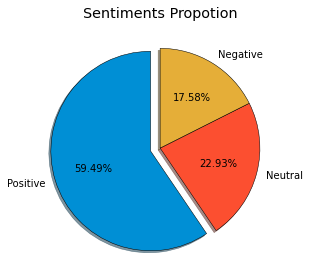

In [20]:
#pie plot to showcase sentiments propotion
counts=pd.DataFrame(df['Analysis'].value_counts())

analysis_counts=counts.values.flatten()
analysis=counts.index
explode=[0.1,0,0]

plt.pie(analysis_counts,labels=analysis,explode=explode,wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct='%1.2f%%',
        startangle=90);
plt.title('Sentiments Propotion');
plt.tight_layout();

In [ ]:
# print all of the positive tweets

sortedDF=df.sort_values(by=['polarity'])

j=1

for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):

    print(str(j) + ')'+sortedDF['tweets'][i])
    print('\n')
    j+=1

1)What a day for South TN dams in Kanyakumari, Tirunelveli, Thenkasi and Theni districts. Rains to reduce from today afternoon. Tomorrow rains will drastically.

Meanwhile in Kerala Idukki Dam is nearing full level. It will be historic event for dam to get into Surplus in October. https://t.co/3rlwgNGo3J


2)Idukki Dam (biggest dam in kerala) inflow jumped to 65000 cusecs (1800+ cumecs) at one point. The dam is now ~ 90% full. It would be historic  if Idukki dam gets to surplus in October. https://t.co/Xs6hWlBymS


3)Two sides UAC and North TN favorite winds remains. 

High waves guidance for Fishermen in Kerala &amp; South Tamil Nadu 

Lots of pictorial explanations of prevailing wind pattern.

Link - https://t.co/DwPpTpByxL


4)Krishnagiri, Dharmapuri, Salem, Namakkal, Karur, Trichy, Thanjavur, Tiruvarur to Nagai. All fell in path of the storms today.

Down south Kanyakumari and South Kerala getting good monsoon bands.

Refer morning post for the convergence areas. https://t.co/zYGpV

In [ ]:
# print the negative tweets
sortedDF=df.sort_values(by=['polarity'],ascending=False)

j=1
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):

    print(str(j) + ')'+sortedDF['tweets'][i])
    print('\n')
    j+=1

1)Crazy rains in Kerala and spillover rains even sustaining into leeward dry regions of Tiruppur, Coimbatore, Nellai etc. This rains should continue till tomorrow. Within few hours some stations in Kerala have recorded 150-200 mm. Stay safe !!! https://t.co/i2Aj3HTcaT


2)What a day for TN, now it is the turn of delta again to get rains for 2nd day in a row.

Meanwhile South Kerala and Kanyakumari has bee getting heavy rains.

Overall a dream day for Tamil Nadu. https://t.co/DIxW1V1FlZ


3)The crazy cloudburst yesterday in Marina beach. 100 mm rainfall in 30 to 40 mins. https://t.co/jsAxtvRBgA


4)South Chennai belt and ECR are seeing heavy rains with breaks more clouds will move in. Sharp spells break then followed by again sharp spells. This will be the pattern today. https://t.co/hMD5C3ZoOk


5)Today evening and night heavy rains in Theni district. This one is from Then-Chinnamannur-Bodi belt. https://t.co/KadhaVNJ2H


6)Widespread heavy rains in Kanyakumari and high gusts (winds) s

81


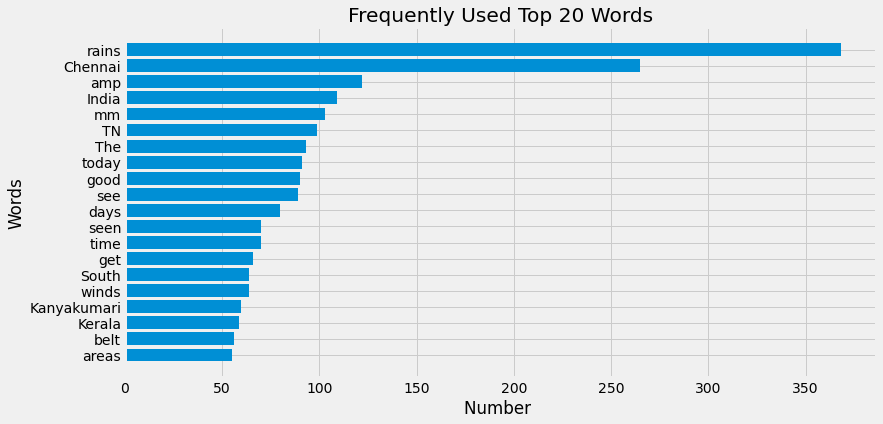

In [22]:
#plot top 20 frequently used words

counter=Counter(allwords.split())
top_100=counter.most_common(102)
frequent_words=list()
freq_popularity=list()
for i ,j in top_100:
  if i!='Tamil' and i!='Nadu'and i!='one'and i!='day' and i!='Day'and i.isalpha()==True and len(i)>1:
    frequent_words.append(i)
    freq_popularity.append(j)
  
print(len(frequent_words))

plt.figure(figsize=(12,6))
x=frequent_words[0:20]
y=freq_popularity[0:20]
x.reverse()
y.reverse()
plt.barh(x,y);
plt.title('Frequently Used Top 20 Words');
plt.ylabel('Words');
plt.xlabel('Number ');

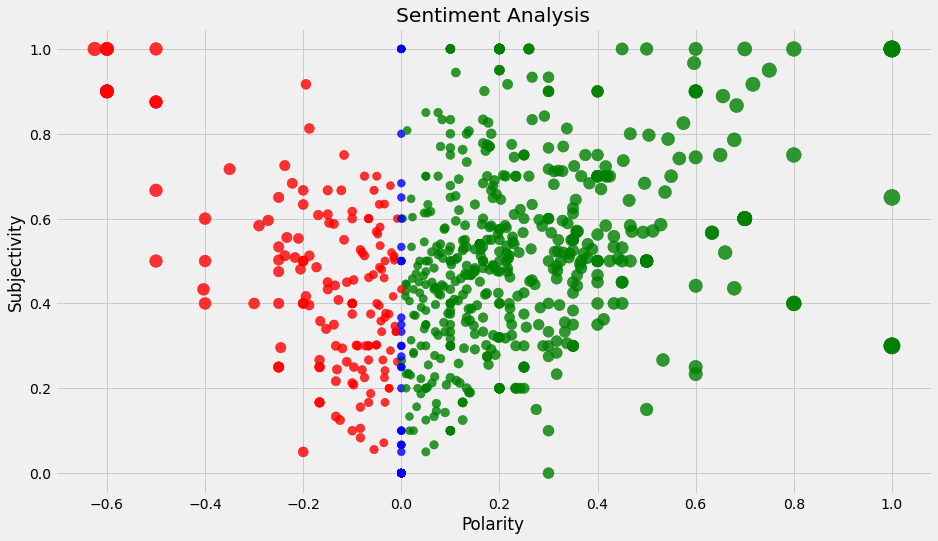

In [23]:
#scatter plot between plority and subjectivity

plt.figure(figsize=(14,8))

marker_size=[(abs(x)+.3)*200 for x in df['polarity']] #marker size will increase based polrity score
marker_color=ar =['red' if i<0 else 'green' if i>0 else 'blue' for i in df['polarity']] #marker color based on polarity

plt.scatter(df['polarity'],df['subjectivity'],s=marker_size,color=marker_color,alpha=0.8)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

## Nearly 60 perentage of the tweets are positive sentiment, in the next version of this notebook another library and technique will be used to enchance sentiment analysis.